<a href="https://colab.research.google.com/github/anandaru/GEN-AI/blob/main/neural_net_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 4*x**2 + 3*x +2

In [3]:
f(3.0)

47.0

In [7]:
xs = np.arange(-5,5,0.25)
xs


array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [8]:
ys = f(xs)
ys

array([ 87. ,  78. ,  69.5,  61.5,  54. ,  47. ,  40.5,  34.5,  29. ,
        24. ,  19.5,  15.5,  12. ,   9. ,   6.5,   4.5,   3. ,   2. ,
         1.5,   1.5,   2. ,   3. ,   4.5,   6.5,   9. ,  12. ,  15.5,
        19.5,  24. ,  29. ,  34.5,  40.5,  47. ,  54. ,  61.5,  69.5,
        78. ,  87. ,  96.5, 106.5])

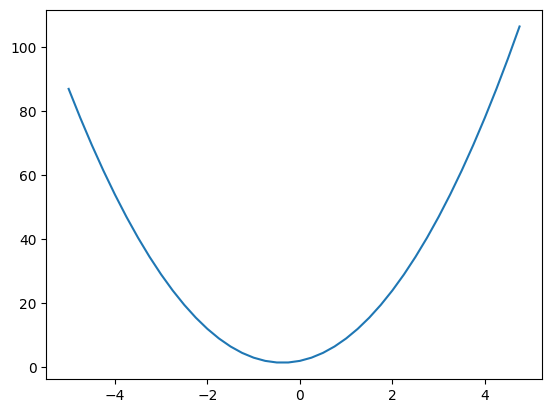

In [9]:
plt.plot(xs,ys)

In [23]:
h=0.001
xs = -3/8
print(f(xs),f(xs+h),(f(xs+h)- f(xs))/h)

1.4375 1.4375040000000001 0.004000000000115023


In [6]:
h=0.001
#inputs
a= 2
b=-3.0
c=8

#function
d1=a*b+c
a+=h
print('a = ',a)
d2=a*b+c
print('d1 = ',d1)
print('d2 = ',d2)
print('slope = ', (d2-d1)/h)



a =  2.001
d1 =  2.0
d2 =  1.9969999999999999
slope =  -3.0000000000001137


In [2]:
h=0.001
#inputs
a= 2
b=-3.0
c=8

#function
d1=a*b+c
b+=h
print('b = ',b)
d2=a*b+c
print('d1 = ',d1)
print('d2 = ',d2)
print('slope = ', (d2-d1)/h)

b =  -2.999
d1 =  2.0
d2 =  2.002
slope =  1.9999999999997797


In [3]:
h=0.001
#inputs
a= 2
b=-3.0
c=8

#function
d1=a*b+c
c+=h
print('c = ',c)
d2=a*b+c
print('d1 = ',d1)
print('d2 = ',d2)
print('slope = ', (d2-d1)/h)

c =  8.001
d1 =  2.0
d2 =  2.0009999999999994
slope =  0.9999999999994458


In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
class Value:
  def __init__(self,data,_children=(),_op='',label=''):
    self.data=data
    self._prev=set(_children)
    self._op = _op
    self.label=label
    self.grad=0.0
  def __repr__(self):
    return f"Value (data={self.data})"
  def __add__(self,other):
    out= Value(self.data + other.data,(self,other),'+')
    return out
  def __mul__(self,other):
    out= Value(self.data * other.data,(self,other),'*')
    return out
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    return out

a= Value(2.0,label='a')
b= Value(-3.0,label= 'b')
c= Value(10.0,label='c')
e= a*b;e.label='e'
d= e+c;d.label='d'
f = Value(-2.0,label = 'f')
L=d*f;L.label= 'L'
L

Value (data=-8.0)

In [8]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s| data %.4f | grad %.4f  }" % ( n.label,n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

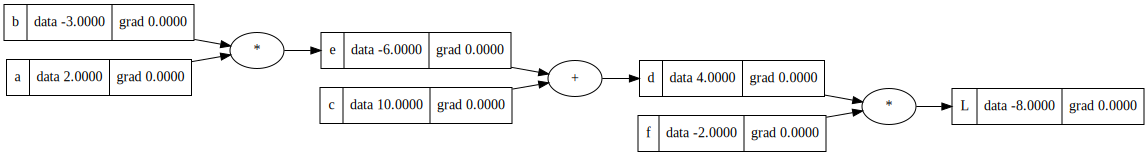

In [9]:
draw_dot(L)

In [10]:
# inputs x1 &  x2
x1= Value(2.0,label='x1')
x2= Value(0.0,label='x2')
# weights w1 & w2
w1= Value(-3.0,label='w1')
w2= Value(1.0,label='w2')
# bias of the neuron
b= Value(6.8813735870195432,label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1 ; x1w1.label = 'x1*w1'
x2w2 = x2*w2 ; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2;x1w1x2w2.label = 'x1*w1 + x2*w2'
n= x1w1x2w2 + b; n.label= 'n'
o= n.tanh();o.label= 'o'


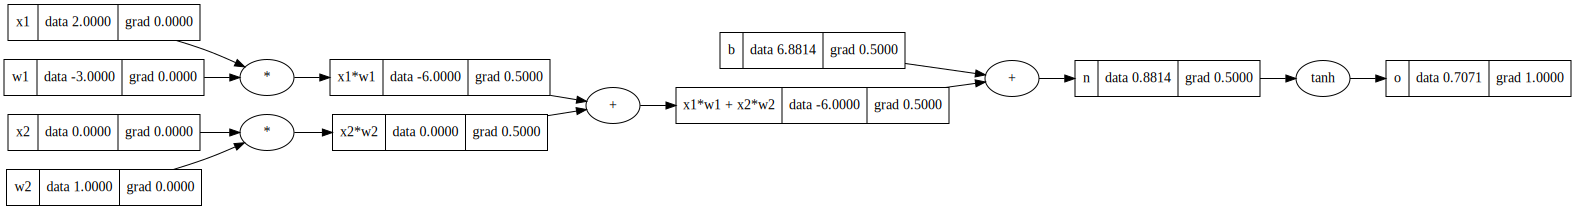

In [61]:
draw_dot(o)

In [19]:
o.grad=1.0


In [13]:
n.grad= 0.5

In [14]:
b.grad = 0.5
x1w1x2w2.grad = 0.5

In [15]:
x1w1.grad= 0.5
x2w2.grad= 0.5

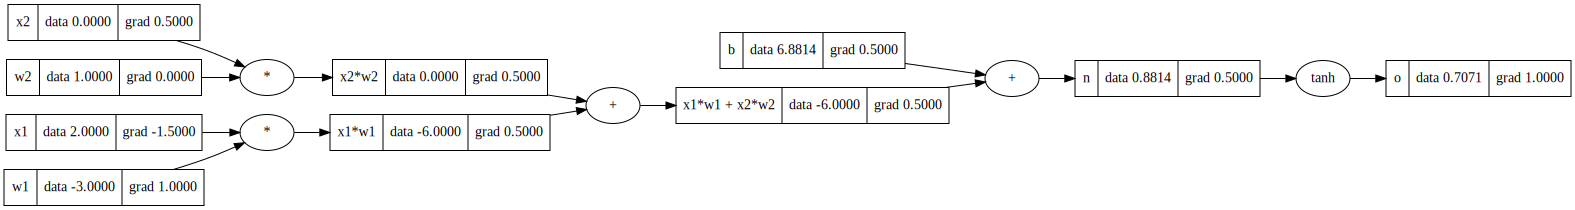

In [20]:
draw_dot(o)

In [17]:
x1.grad= w1.data * x1w1.grad
w1.grad= x1.data * x1w1.grad
x2.grad= w2.data * x2w2.grad
w2.grad= x2.data * x2w2.grad

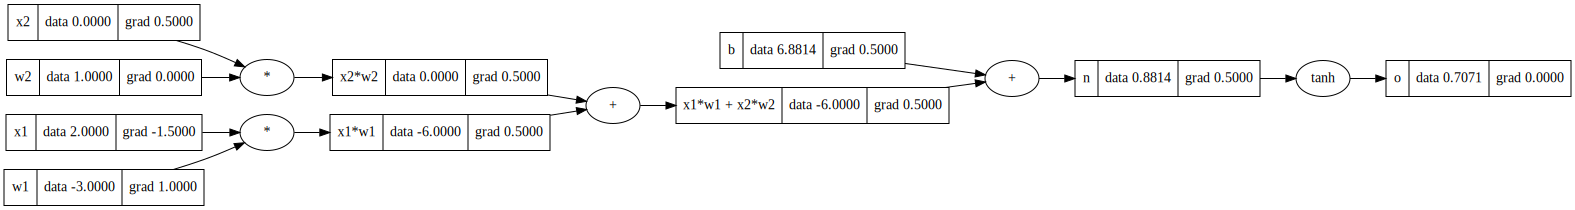

In [18]:
draw_dot(o)

In [51]:

#o=tanh(n)
#do/dn = 1- o**2

In [33]:
a.data+= 0.01 * a.grad
b.data+= 0.01 * b.grad
c.data+= 0.01 * c.grad
f.data+= 0.01 * f.grad

e= a*b;
d= e+c;
L=d*f;
L

Value (data=-7.286496)

In [28]:
L.grad=1

In [29]:
f.grad= 4.0
d.grad = -2.0

In [30]:
c.grad = -2.0
e.grad = -2.0

In [31]:
a.grad= -2 * -3
b.grad= -2* 2

In [3]:
def lol():
  h=0.001
  a= Value(2.0,label='a')
  b= Value(-3.0,label= 'b')
  c= Value(10.0,label='c')
  e= a*b;e.label='e'
  d= e+c;d.label='d'
  f = Value(-2.0,label = 'f')
  L=d*f;L.label= 'L'
  L1=L.data

  a= Value(2.0,label='a')
  b= Value(-3.0,label= 'b')
  b.data+=h
  c= Value(10.0,label='c')
  e= a*b;e.label='e'
  d= e+c;d.label='d'
  f = Value(-2.0,label = 'f')
  L=d*f;L.label= 'L'
  L2=L.data

  print((L2-L1)/h)
lol()

NameError: name 'Value' is not defined